# CSIT456 Final Project: Stock Price Variation


## Name: Jhony Ortiz,Sai Moturi, Aaron Hayward

1. For this project we will use historical stock price data for the Apple Stock
2. The dataset contains dates - starting from May 5, 2021 and 20 years
3. Will use the past 100 days to try to predict if the price at closing was up or down


### Import Libraries 

In [1]:
# This program uses a machine learning algorithm called a Decision Tree to predict if the price
# of a stock will increase or decrease

#import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

plt.style.use('fivethirtyeight')

### Load Dataset and trim to use last 100 days

In [2]:
#read the file and store data
df = pd.read_csv('AAPL-2.csv')

df.shape

#Set Datae as index

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Use the last 100 days
df = df.tail(100)

#Give the index a name
df.index.name = 'Date'

# Change the format for the Date column
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#### Description of Dataframe 
1. Important to find any missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-12-10 to 2021-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       100 non-null    datetime64[ns]
 1   Open       100 non-null    float64       
 2   High       100 non-null    float64       
 3   Low        100 non-null    float64       
 4   Close      100 non-null    float64       
 5   Adj Close  100 non-null    float64       
 6   Volume     100 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.2 KB


# Data Cleaning and Prep Dataset
1. Create Target Dataset
2. Will be used later in the machine learning models
3. If Price increases it will receive value of 1, if decreases 0
4. This will be done by shifting to the next day and comparing it. 

In [4]:
# Shift to next day and compare it. If greater set value to one, else 0
#df['Close_Change']= np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df['Close_Change']= np.where(df['Close'] > df['Open'], 1, 0)
#Remove Date column
df = df.drop(columns = 'Date')

#Display the Dataframe
df

,Open,High,Low,Close,Adj Close,Volume,Close_Change
Date,,,,,,,
2020-12-10,120.500000,123.870003,120.150002,123.239998,123.056114,81312200,1
2020-12-11,122.430000,122.760002,120.550003,122.410004,122.227356,86939800,0
2020-12-14,122.599998,123.349998,121.540001,121.779999,121.598289,79184500,0
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.689186,157243700,1
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.619293,98208600,1
...,...,...,...,...,...,...,...
2021-04-29,136.470001,137.070007,132.449997,133.479996,133.479996,151101000,0
2021-04-30,131.779999,133.559998,131.070007,131.460007,131.460007,109713200,0
2021-05-03,132.039993,134.070007,131.830002,132.539993,132.539993,75135100,1


#### Add Column
1. Add column called Price Variation.
2. Subtract the start of the day and close of the day
3. Give an idea of the price variation of the day for the past 100 days

In [5]:
#df['Price_Variation']= df['Open']-df['Close']
df['Price_Variation']= df['Close']-df['Open']
df

,Open,High,Low,Close,Adj Close,Volume,Close_Change,Price_Variation
Date,,,,,,,,
2020-12-10,120.500000,123.870003,120.150002,123.239998,123.056114,81312200,1,2.739998
2020-12-11,122.430000,122.760002,120.550003,122.410004,122.227356,86939800,0,-0.019996
2020-12-14,122.599998,123.349998,121.540001,121.779999,121.598289,79184500,0,-0.819999
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.689186,157243700,1,3.540001
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.619293,98208600,1,0.399994
...,...,...,...,...,...,...,...,...
2021-04-29,136.470001,137.070007,132.449997,133.479996,133.479996,151101000,0,-2.990005
2021-04-30,131.779999,133.559998,131.070007,131.460007,131.460007,109713200,0,-0.319992
2021-05-03,132.039993,134.070007,131.830002,132.539993,132.539993,75135100,1,0.500000


#### Data Prepartion
1. Create Features to be used for the data models

In [6]:
features = ["Open", "High", "Low", "Close", "Adj Close","Volume","Close_Change"]
apple = df[features]
apple.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_Change
Date,,,,,,,
2020-12-10,120.500000,123.870003,120.150002,123.239998,123.056114,81312200,1
2020-12-11,122.430000,122.760002,120.550003,122.410004,122.227356,86939800,0
2020-12-14,122.599998,123.349998,121.540001,121.779999,121.598289,79184500,0
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.689186,157243700,1
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.619293,98208600,1
2020-12-17,128.899994,129.580002,128.039993,128.699997,128.507965,94359800,0
2020-12-18,128.960007,129.100006,126.120003,126.660004,126.471016,192541500,0
2020-12-21,125.019997,128.309998,123.449997,128.229996,128.038666,121251600,1
2020-12-22,131.610001,134.410004,129.649994,131.880005,131.683228,168904800,1


## Data Exploration
1. Past 100 Days, How many days were up or down?
2. After 100 days, was there a positive or negative gain?
3. Visualize the data

In [7]:

apple['Close_Change'].value_counts()

0    57
1    43
Name: Close_Change, dtype: int64

In [8]:
df['Price_Variation'].sum()

-13.970050000000171

In [9]:
df['Price_Variation'].describe()

count    100.000000
mean      -0.139701
std        1.906977
min       -4.569999
25%       -1.339994
50%       -0.210002
75%        1.027490
max        4.040001
Name: Price_Variation, dtype: float64

In [10]:
apple['Close'].describe()

count    100.000000
mean     129.258900
std        5.905387
min      116.360001
25%      124.567501
50%      129.790001
75%      133.775001
max      143.160004
Name: Close, dtype: float64

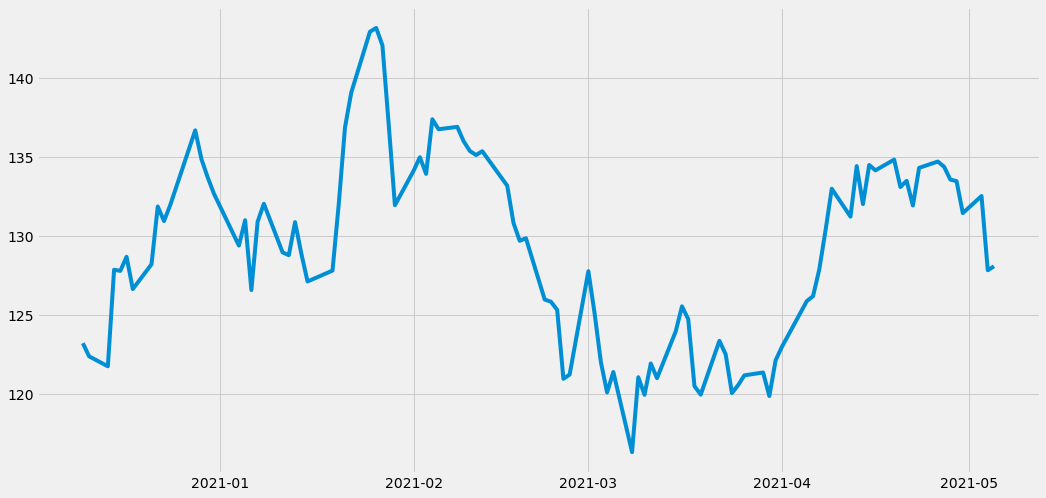

In [11]:
plt.figure(figsize=(16,8))
plt.plot(apple["Close"], label = 'Apple Close Price History for 100 Days')

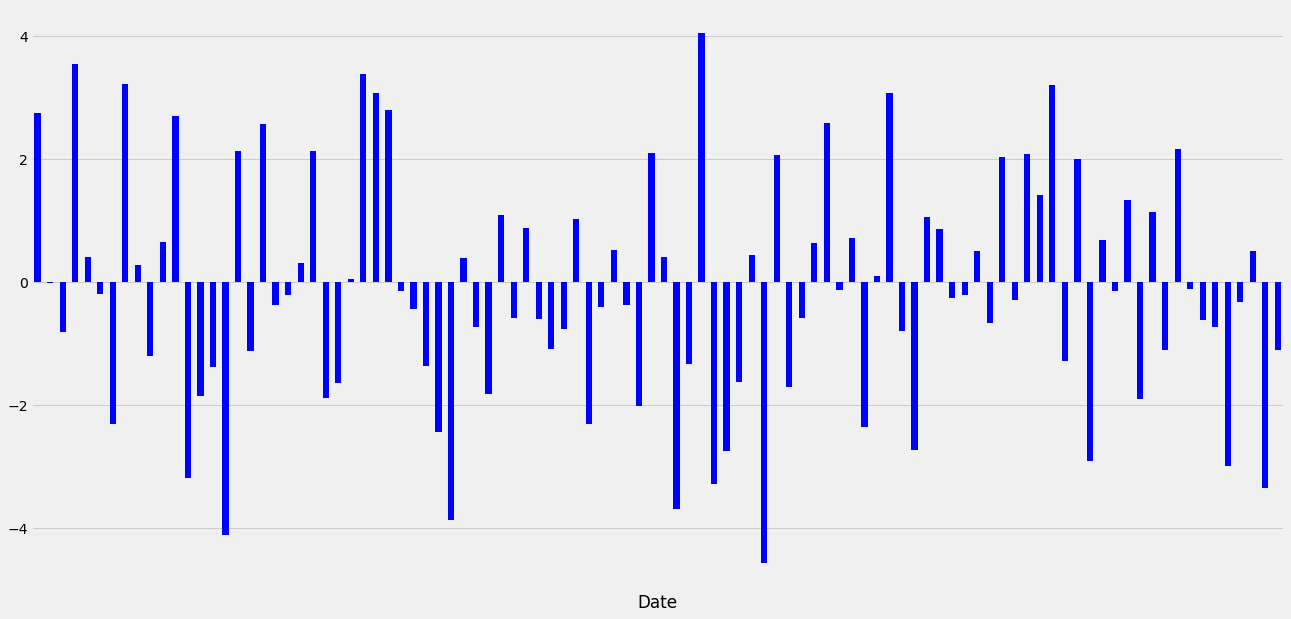

In [13]:
data = df['Price_Variation']
data.loc[:].plot(kind='bar', color = 'b')
plt.xticks([])
plt.show()

## Machine Learning Models
1. Two models will be used, Decision Tree and KnnNeighbors
2. Data will be split into features and target variables
3. Features will be scaled using MinMaxScaler
4. Split the data into train and test datasets


In [14]:
#Split Dataset into a feature and a target dataset

X = apple.loc[:, "Open":"Volume"].values
y = apple.loc[:,"Close_Change"].values


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
sc.transform(X)

array([[-21.9390991 , -22.44799127, -22.18002516, -22.17290659,
        -22.29303088,  -3.56492527],
       [-21.88487641, -22.48009222, -22.16819518, -22.19694706,
        -22.31731502,  -3.56492527],
       [-21.88010038, -22.46302969, -22.13891613, -22.21519493,
        -22.33574785,  -3.56492528],
       [-21.83121573, -22.33144469, -22.06231735, -22.03851072,
        -22.15727331,  -3.56492519],
       [-21.7449649 , -22.31785261, -21.9904504 , -22.04053822,
        -22.15932131,  -3.56492526],
       [-21.70310415, -22.28285951, -21.94667975, -22.01475972,
        -22.13328158,  -3.56492526],
       [-21.7014181 , -22.29674087, -22.0034632 , -22.07384737,
        -22.19296795,  -3.56492515],
       [-21.81211133, -22.31958771, -22.08242826, -22.02837313,
        -22.14703291,  -3.56492523],
       [-21.62696743, -22.14317704, -21.8990642 , -21.92265195,
        -22.0402405 ,  -3.56492518],
       [-21.61151528, -22.20043847, -21.86564445, -21.94929936,
        -22.06715791,  -3.5

In [16]:
#from sklearn import preprocessing
#sc = preprocessing.MinMaxScaler()
#X = sc.fit_transform(X)
#sc.transform(X)

In [17]:
#Split Data into 65% Training and 35% testing 
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.30, random_state = 42)

In [18]:
#from sklearn import preprocessing
#sc = preprocessing.MinMaxScaler()
#X_train_minmax = sc.fit_transform(X_train)
#sc.transform(X_test)

# Decision Tree Model

In [19]:
#Create and Train the model (DecisionTreeClassifier)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Show how well model did on test data set
tree.score(X_test, y_test)

0.6333333333333333

In [20]:
#Show the models preditions
tree_predictions = tree.predict(X_test)


In [21]:
# Use Graphviz
tree_dot = export_graphviz(tree, out_file=None, feature_names=features[:apple.shape[1]-1])
tree_dot

'digraph Tree {\nnode [shape=box] ;\n0 [label="Open <= 0.777\\ngini = 0.493\\nsamples = 70\\nvalue = [39, 31]"] ;\n1 [label="High <= 0.361\\ngini = 0.498\\nsamples = 53\\nvalue = [25, 28]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Open <= -1.295\\ngini = 0.487\\nsamples = 43\\nvalue = [25, 18]"] ;\n1 -> 2 ;\n3 [label="Close <= -1.585\\ngini = 0.32\\nsamples = 10\\nvalue = [2, 8]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n3 -> 5 ;\n6 [label="Adj Close <= -0.974\\ngini = 0.422\\nsamples = 33\\nvalue = [23, 10]"] ;\n2 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 8\\nvalue = [8, 0]"] ;\n6 -> 7 ;\n8 [label="Low <= -0.56\\ngini = 0.48\\nsamples = 25\\nvalue = [15, 10]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n8 -> 9 ;\n10 [label="Volume <= -0.227\\ngini = 0.375\\nsamples = 20\\nvalue = [15, 5]"] ;\n8 -> 10 ;\n11 [label="Low <= 0.002\\ngi

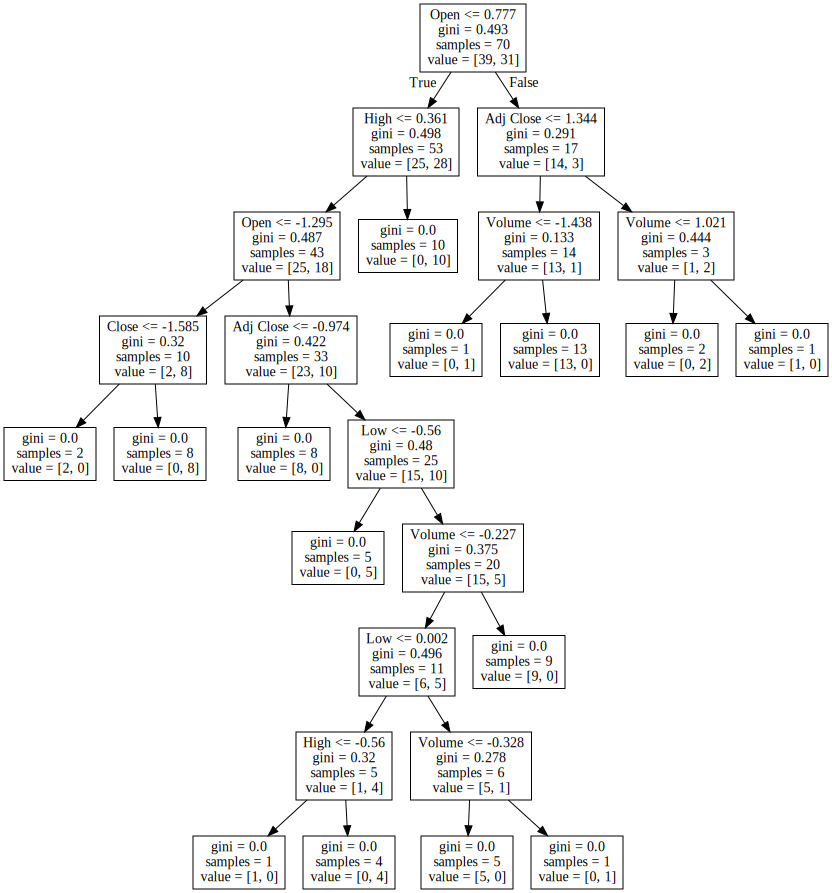

In [22]:
import graphviz
graphviz.Source(tree_dot)

### Use GridSearch to find the best parameters

In [23]:
#Use GridSearchCV 

from sklearn.model_selection import GridSearchCV
param_grid={'max_leaf_nodes': range(2,20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [24]:
# Model Score
grid.score(X_test, y_test)

0.6333333333333333

In [25]:
best_tree = grid.best_estimator_
best_tree

DecisionTreeClassifier(max_leaf_nodes=13, random_state=0)

In [26]:
best_tree_dot = export_graphviz(best_tree, out_file=None, feature_names=features[1:])
best_tree_dot

'digraph Tree {\nnode [shape=box] ;\n0 [label="High <= 0.777\\ngini = 0.493\\nsamples = 70\\nvalue = [39, 31]"] ;\n1 [label="Low <= 0.361\\ngini = 0.498\\nsamples = 53\\nvalue = [25, 28]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n3 [label="High <= -1.295\\ngini = 0.487\\nsamples = 43\\nvalue = [25, 18]"] ;\n1 -> 3 ;\n5 [label="Low <= -1.656\\ngini = 0.32\\nsamples = 10\\nvalue = [2, 8]"] ;\n3 -> 5 ;\n7 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n5 -> 8 ;\n6 [label="Volume <= -0.974\\ngini = 0.422\\nsamples = 33\\nvalue = [23, 10]"] ;\n3 -> 6 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [8, 0]"] ;\n6 -> 9 ;\n10 [label="High <= -0.677\\ngini = 0.48\\nsamples = 25\\nvalue = [15, 10]"] ;\n6 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n10 -> 11 ;\n12 [label="Close_Change <= -0.227\\ngini = 0.375\\nsamples = 20\\nvalue = [15, 5]"] ;\n10 -> 12 ;\n13 [label="High <= -

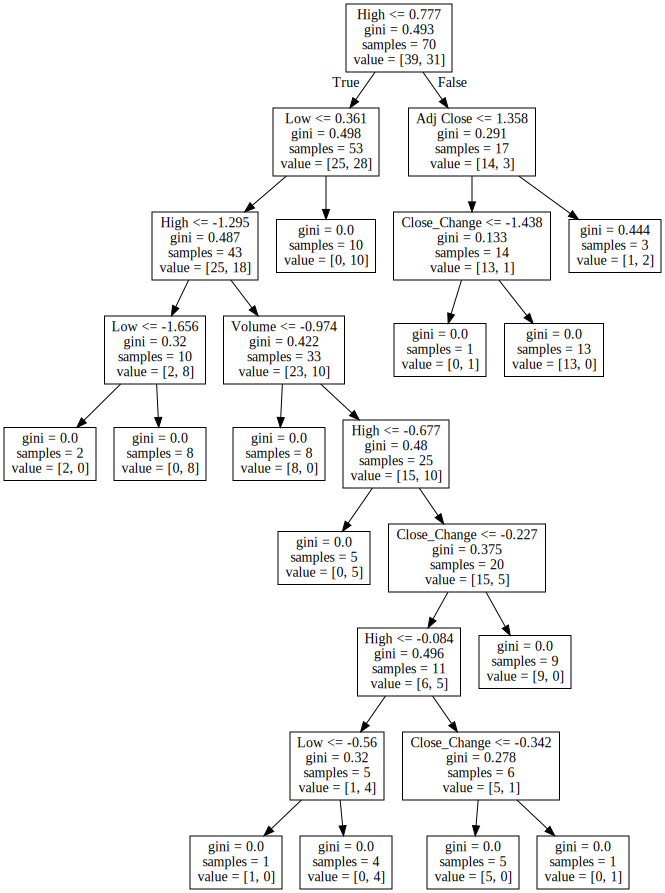

In [27]:
import graphviz
graphviz.Source(best_tree_dot)

### Get some metrics on the Decision Tree Model

In [28]:
y_grid_predict = grid.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_grid_predict)

array([[11,  7],
       [ 4,  8]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_grid_predict))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.53      0.67      0.59        12

    accuracy                           0.63        30
   macro avg       0.63      0.64      0.63        30
weighted avg       0.65      0.63      0.64        30



In [30]:
y_grid_prob = grid.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_grid_prob)

Text(0.5, 1.0, 'Decision Tree ROC Curve')

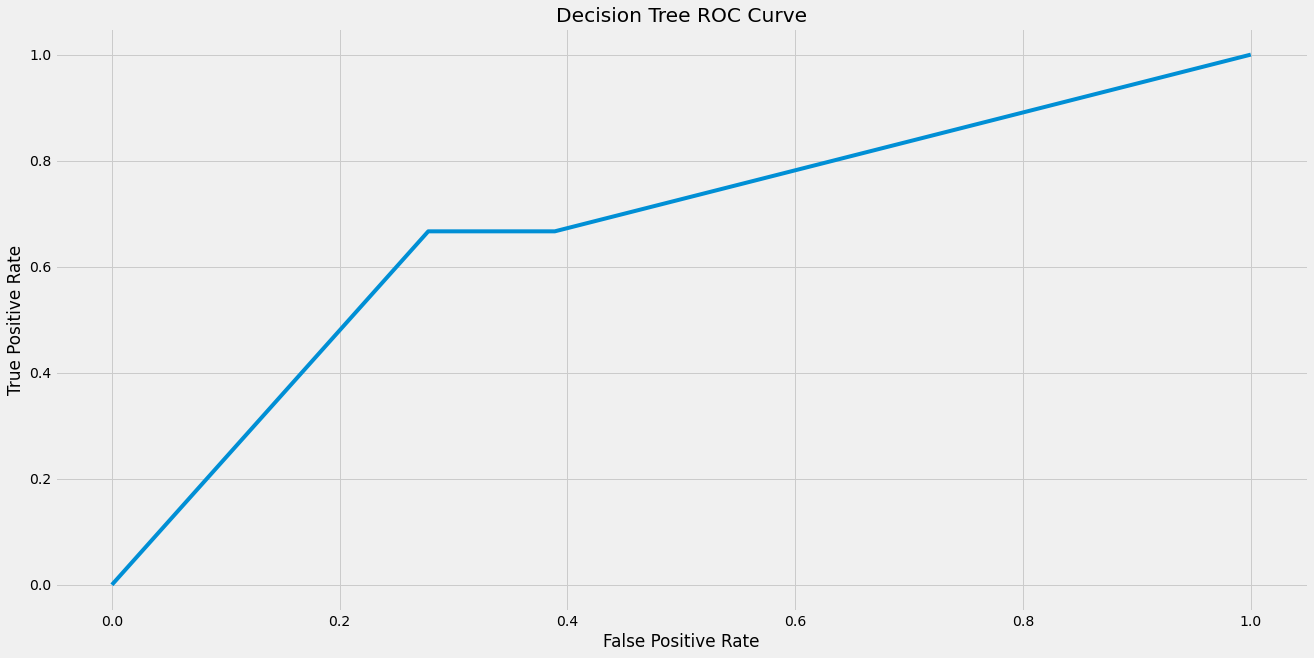

In [31]:
plt.plot(fpr, tpr, label = 'Decision Tree ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')

# KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knn.score(X_test, y_test)

0.7

##### Find best parameters for the model

In [34]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True)

In [35]:
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1, 16, 2)
cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv = skfold)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

best cross-validation score: 0.586
best n_neighbors: 1


In [36]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8

#### Metrics on the KNN Model

In [37]:
y_knn_predict = knn.predict(X_test)
confusion_matrix(y_test, y_knn_predict)

array([[15,  3],
       [ 3,  9]])

In [38]:
print(classification_report(y_test, y_knn_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30



In [39]:
y_knn_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_knn_prob)

Text(0.5, 1.0, 'KNN ROC Curve')

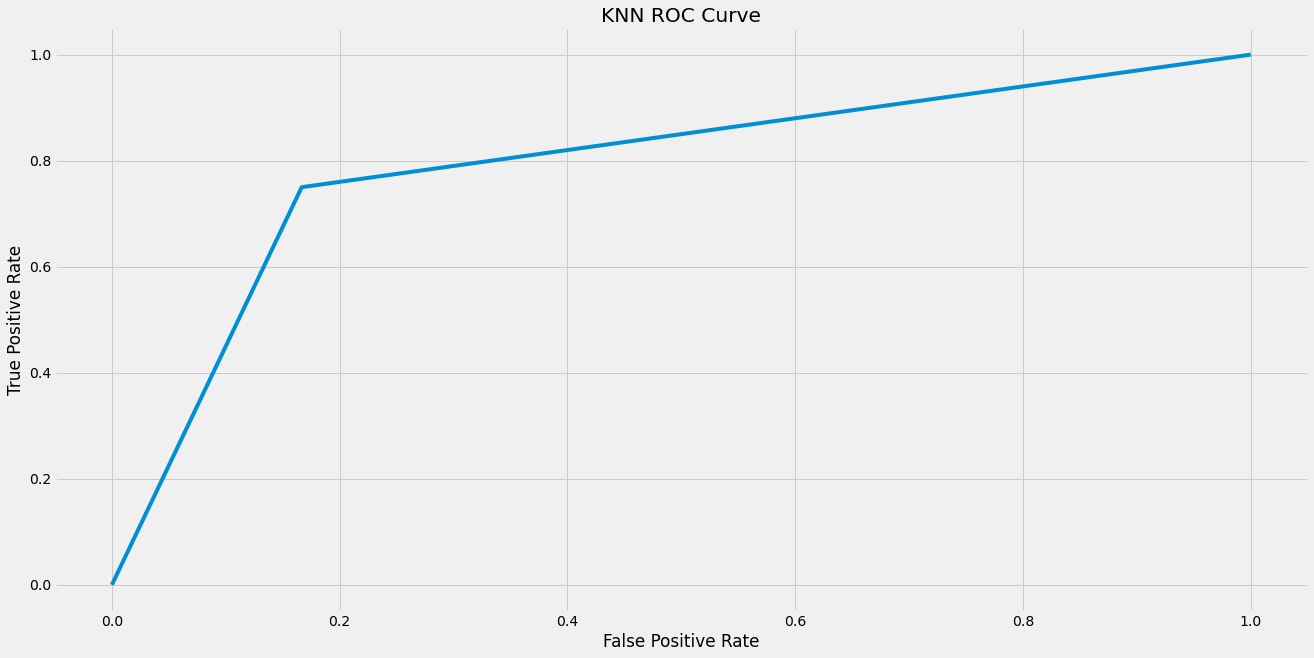

In [40]:
plt.plot(fpr, tpr, label = 'KNN ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')

# Conclusions
1. Knn Model Perfomed better than the Decision Tree model
2. Both models are not too accurate

In [41]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred_lr)

array([[18,  0],
       [ 2, 10]])

In [43]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [44]:
y_pred_prob = reg.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9953703703703703

Text(0.5, 1.0, 'LR ROC Curve')

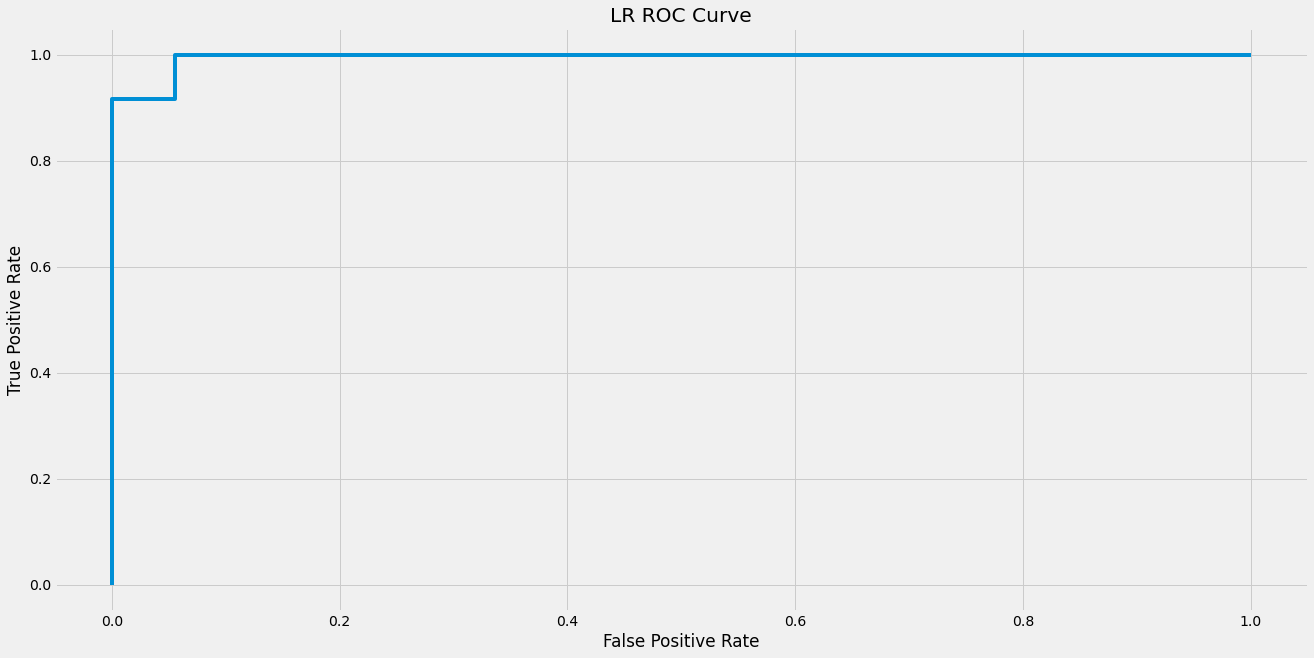

In [47]:
plt.plot(fpr, tpr, label = 'Logistic Regression ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC Curve')